In [3]:
!pip install torch-lr-finder
!pip install torchsummary
!pip install lightning-bolts

In [4]:
import torch
import torchvision
from torchvision import transforms as T
train_data = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=T.ToTensor())

0

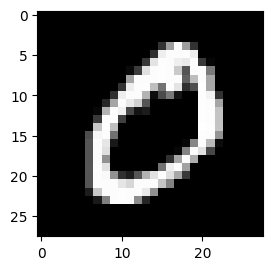

In [5]:
import numpy as np
data, label = train_data[1]
data = torch.stack([data.squeeze(0), data.squeeze(0), data.squeeze(0)], dim=0)

import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
#img = np.array(data.permute(1,2,0), np.int16)
plt.imshow(data.permute(1,2,0))
label

In [6]:
from dataset.MNIST import get_dataloader

batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}
train_dataloader, test_dataloader = get_dataloader(**kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
from main import init
from models.VAE import VAE

from config import vae_config as cfg


model = VAE(
    enc_out_dim=cfg['enc_out_dim'],
    latent_dim=cfg['latent_dim'],
    num_embed=cfg['num_classes'],
    input_height=cfg['image_size'])

model = init(train_dataloader, test_dataloader, model, cfg, in_channels=3, out_channels=3, show_summary=False, accelerator='gpu')

/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task: Union[FeatureMapContrastiveTask] = FeatureMapCon

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch  0
Train Loss:  4157.0244140625
Val Loss:  3659.7314453125


Validation: 0it [00:00, ?it/s]

Epoch  1
Train Loss:  3517.4111328125
Val Loss:  3416.253173828125


Validation: 0it [00:00, ?it/s]

Epoch  2
Train Loss:  3354.888916015625
Val Loss:  3296.258544921875


Validation: 0it [00:00, ?it/s]

Epoch  3
Train Loss:  3259.424560546875
Val Loss:  3218.6962890625


Validation: 0it [00:00, ?it/s]

Epoch  4
Train Loss:  3196.856201171875
Val Loss:  3167.150390625


Validation: 0it [00:00, ?it/s]

Epoch  5
Train Loss:  3152.610595703125
Val Loss:  3129.851318359375


Validation: 0it [00:00, ?it/s]

Epoch  6
Train Loss:  3118.662353515625
Val Loss:  3099.6689453125


Validation: 0it [00:00, ?it/s]

Epoch  7
Train Loss:  3090.95068359375
Val Loss:  3072.818603515625


Validation: 0it [00:00, ?it/s]

Epoch  8
Train Loss:  3067.680419921875
Val Loss:  3055.66552734375


Validation: 0it [00:00, ?it/s]

Epoch  9
Train Loss:  3047.468994140625
Val Loss:  3036.476806640625


Validation: 0it [00:00, ?it/s]

Epoch  10
Train Loss:  3030.01953125
Val Loss:  3018.968017578125


Validation: 0it [00:00, ?it/s]

Epoch  11
Train Loss:  3014.1181640625
Val Loss:  3005.147705078125


Validation: 0it [00:00, ?it/s]

Epoch  12
Train Loss:  2999.3798828125
Val Loss:  2990.406005859375


Validation: 0it [00:00, ?it/s]

Epoch  13
Train Loss:  2985.1142578125
Val Loss:  2974.35986328125


Validation: 0it [00:00, ?it/s]

Epoch  14
Train Loss:  2971.141845703125
Val Loss:  2961.620361328125


Validation: 0it [00:00, ?it/s]

Epoch  15
Train Loss:  2957.744873046875
Val Loss:  2947.656005859375


Validation: 0it [00:00, ?it/s]

Epoch  16
Train Loss:  2945.140625
Val Loss:  2938.567626953125


Validation: 0it [00:00, ?it/s]

Epoch  17
Train Loss:  2932.244873046875
Val Loss:  2924.098388671875


Validation: 0it [00:00, ?it/s]

Epoch  18
Train Loss:  2919.498779296875
Val Loss:  2909.656005859375


Validation: 0it [00:00, ?it/s]

Epoch  19
Train Loss:  2906.477294921875
Val Loss:  2901.24072265625


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[3, 2, 6, 0]
[3, 2, 6, 0]
[3, 2, 6, 0]
[3, 2, 6, 0]
[2, 3, 8, 2]
[2, 3, 8, 2]
[2, 3, 8, 2]
[2, 3, 8, 2]
[8, 0, 3, 8]
[8, 0, 3, 8]
[8, 0, 3, 8]
[8, 0, 3, 8]
[3, 0, 1, 7]
[3, 0, 1, 7]
[3, 0, 1, 7]
[3, 0, 1, 7]
[9, 2, 7, 3]
[9, 2, 7, 3]
[9, 2, 7, 3]
[9, 2, 7, 3]
[1, 5, 7, 0]
[1, 5, 7, 0]
[1, 5, 7, 0]
[1, 5, 7, 0]
[6, 8, 2, 8]
[6, 8, 2, 8]
[6, 8, 2, 8]
[6, 8, 2, 8]
[2, 1, 3, 7]
[2, 1, 3, 7]
[2, 1, 3, 7]
[2, 1, 3, 7]
[1, 2, 2, 9]
[1, 2, 2, 9]
[1, 2, 2, 9]
[1, 2, 2, 9]
[6, 6, 8, 1]
[6, 6, 8, 1]
[6, 6, 8, 1]
[6, 6, 8, 1]
[1, 8, 1, 8]
[1, 8, 1, 8]
[1, 8, 1, 8]
[1, 8, 1, 8]
[6, 6, 3, 8]
[6, 6, 3, 8]
[6, 6, 3, 8]
[6, 6, 3, 8]
[6, 2, 6, 1]
[6, 2, 6, 1]
[6, 2, 6, 1]
[6, 2, 6, 1]
[4, 4, 6, 3]
[4, 4, 6, 3]
[4, 4, 6, 3]
[4, 4, 6, 3]
[1, 9, 2, 8]
[1, 9, 2, 8]
[1, 9, 2, 8]
[1, 9, 2, 8]
[5, 0, 4, 2]
[5, 0, 4, 2]
[5, 0, 4, 2]
[5, 0, 4, 2]
[4, 4, 7, 2]
[4, 4, 7, 2]
[4, 4, 7, 2]
[4, 4, 7, 2]
[7, 0, 0, 2]
[7, 0, 0, 2]
[7, 0, 0, 2]
[7, 0, 0, 2]
[8, 5, 4, 2]
[8, 5, 4, 2]
[8, 5, 4, 2]
[8, 5, 4, 2]
[2, 3, 0, 3]

[1, 4, 7, 0]


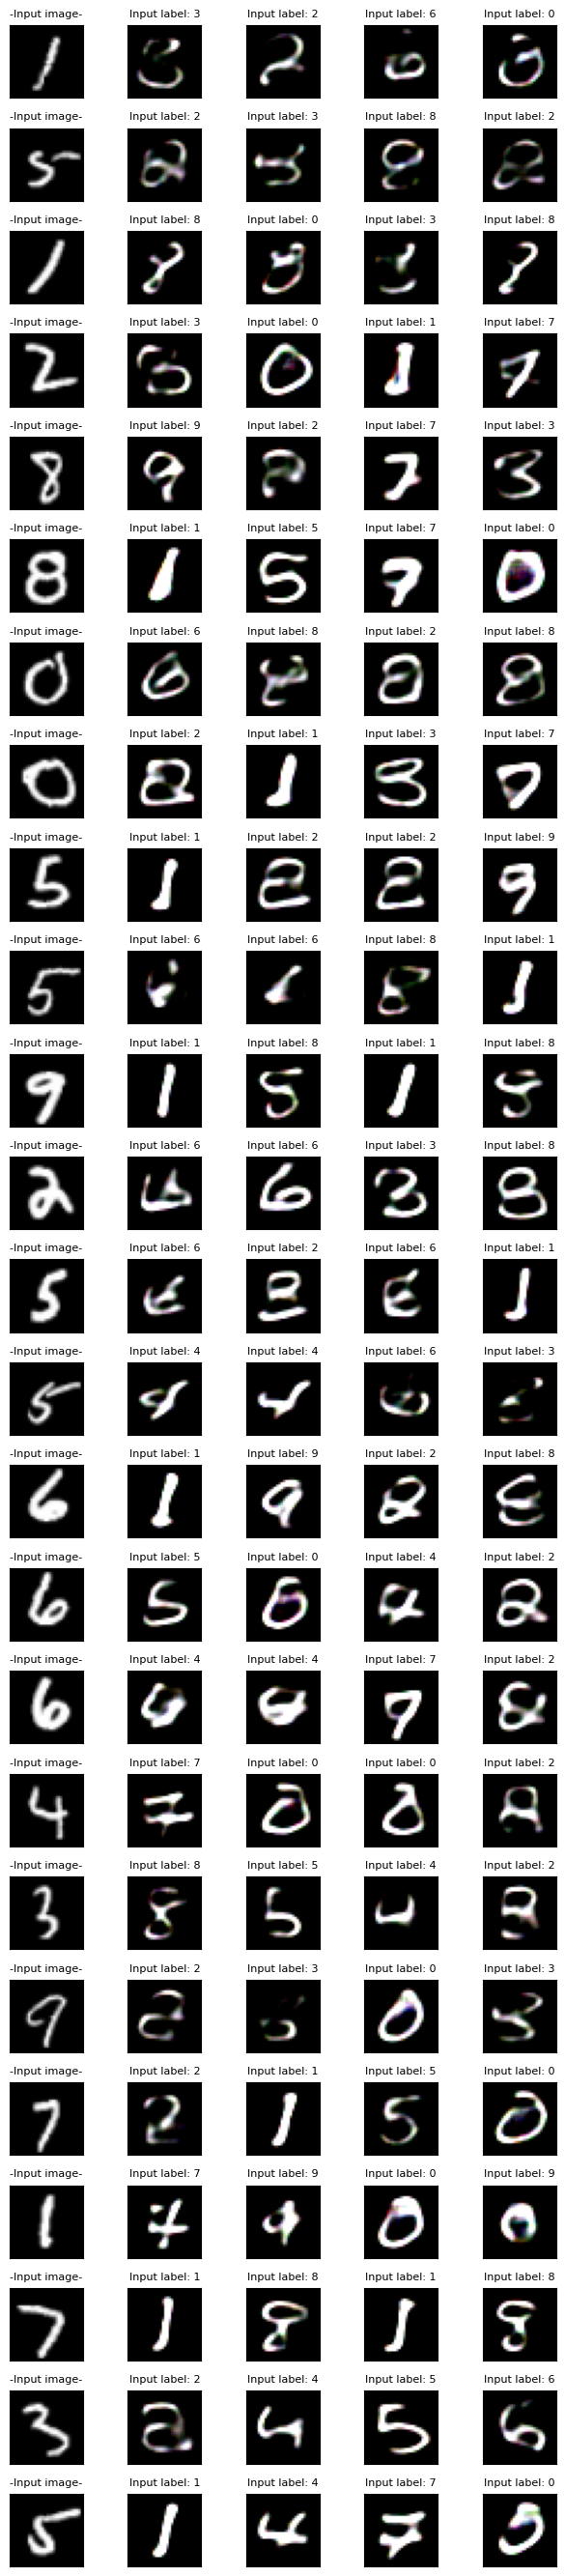

In [15]:
from utils import device, plot_vae_images
from config import vae_config
import random
import torch
from torchvision import transforms as T

from dataset.MNIST import MultiChannelMNIST
import matplotlib.pyplot as plt
import numpy as np

def plot_vae_images(input_imgs, input_labels, pred_imgs):
    cols = 5
    rows = 25

    plt.figure(figsize = (6,27))
    c = 1
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            if j == 1:
                plt.subplot(rows, cols, c)
                plt.tight_layout()
                plt.imshow(input_imgs[i - 1].cpu().permute(1, 2, 0), aspect='auto')
                plt.title('-Input image-', fontsize=8)
                plt.xticks([])
                plt.yticks([])

            else:
                plt.subplot(rows, cols, c)
                plt.tight_layout()
                plt.imshow(pred_imgs[i - 1][j - 2].detach().cpu().permute(1, 2, 0), aspect='auto')
                plt.title('Input label: ' + str(input_labels[i - 1][j - 2]), fontsize=8)
                #plt.title(str(input_labels[i - 1][j - 2]), fontsize=8)
                plt.xticks([])
                plt.yticks([])

            c += 1

    plt.show()

def validate_vae(net, count=40):
    cfg = vae_config
    image_transform = T.Compose(
        [
            T.Resize((cfg['image_size'], cfg['image_size'])),
            T.ToTensor()
        ]
    )

    test_data = MultiChannelMNIST(root='../data', train=False, download=True, transform=image_transform)
    input_images = []
    input_labels = []
    test_data_list = list(test_data)
    random_25_samples = random.sample(test_data_list, 25)

    for data, label in random_25_samples:
        i_label = []

        input_images.append(data)
        for k in range(count // 10):
            temp = random.randint(0, 9)
            if temp == label:
                temp += random.choice([-1, 1])

            i_label.append(temp)
        input_labels.append(i_label)


    net.eval()
    pred_images = []
    for i in range(25):
        p_imgs = []
        for j in range( len(input_labels[i]) ):
            x = input_images[i].unsqueeze(0), torch.tensor(input_labels[i][j]).unsqueeze(0)
            print(input_labels[i])
            try:
                x_hat = net(x)
            except:
                continue
            p_imgs.append(x_hat.squeeze(0))

        pred_images.append( p_imgs )

    plot_vae_images(input_images, input_labels, pred_images)

validate_vae(model)